In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [4]:
# Load data
train_df = pd.read_csv('Titanic-Dataset.csv')
test_df = pd.read_csv('Titanic-Dataset.csv')


In [10]:
print(train_df.head())
print(train_df.info())
print(train_df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [12]:
# Fill missing values for age with median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing values for embarked with the most common value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


C:\Users\MY PC\AppData\Local\Temp\ipykernel_10352\2391114826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\MY PC\AppData\Local\Temp\ipykernel_10352\2391114826.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [14]:
# Convert categorical features to numerical
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' feature to numerical
train_df = pd.get_dummies(train_df, columns=['Embarked'])
test_df = pd.get_dummies(test_df, columns=['Embarked'])


In [16]:
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = train_df['Survived']

# Prepare test data features
X_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]


In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
y_pred = model.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


0.8100558659217877
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [24]:
test_predictions = model.predict(X_test)
test_df['Survived'] = test_predictions
test_df[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\MY PC\AppData\Local\Temp\ipykernel_10352\1869917582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='Set1')


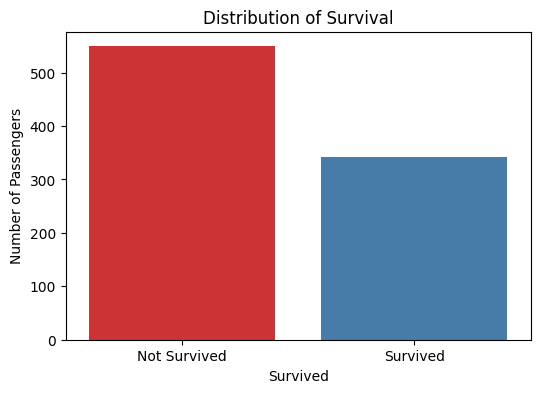

In [32]:
# Plot the distribution of survival in the training data
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df, palette='Set1')
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()


C:\Users\MY PC\AppData\Local\Temp\ipykernel_10352\2158357544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train_df, palette='Set2')


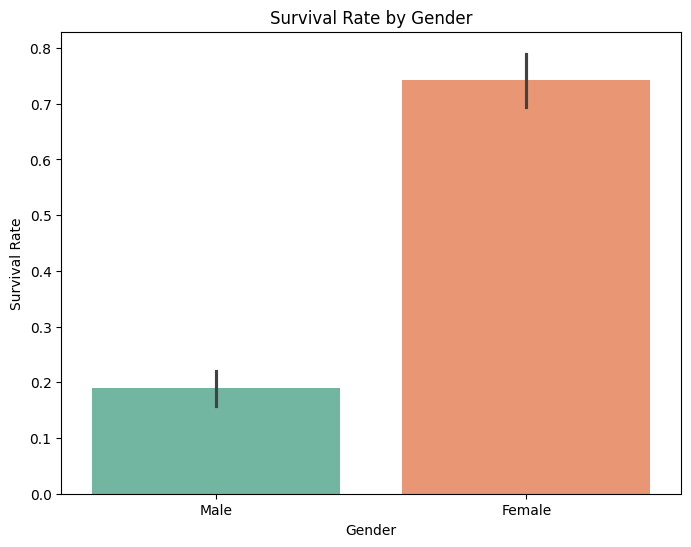

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_df, palette='Set2')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()


C:\Users\MY PC\AppData\Local\Temp\ipykernel_10352\1646422149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train_df, palette='Set2')


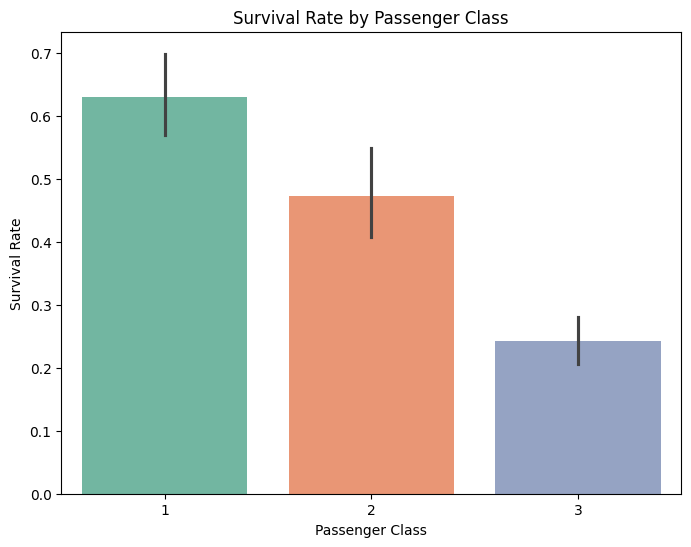

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\MY PC\AppData\Local\Temp\ipykernel_10352\1646422149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train_df, palette='Set2')


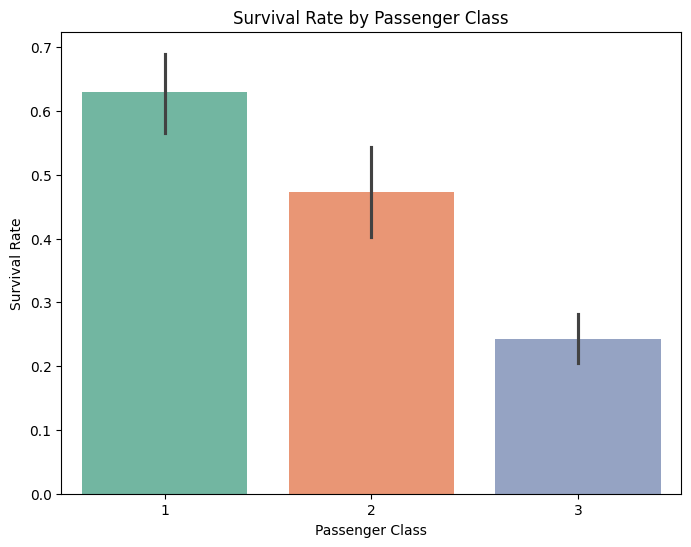

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
